# My question is which restaurants have an unusually high Google rating compared to their Yelp rating, or vice versa.
# I think an observational study is best for this, as we won't be doing any modification of existing data.
# I will examine a sample of Denver restaurants that are present on both Google and Yelp.
# I will use the dataset curated by Sonia Spindt, my teacher, which contains Google and Yelp review metadata for 75 restaurants in Denver.
# Biases:
# The dataset attempts to cover solely ramen restaurants, which may appear different review-wise compared to other restaurants.
# The dataset likely reflects the restaurants Ms. Spindt is more familiar with, given she lives in the area data was collected from.

Pearson correlation coefficient: 0.6358048436252546
Coefficient of determination: 0.40424779917733444


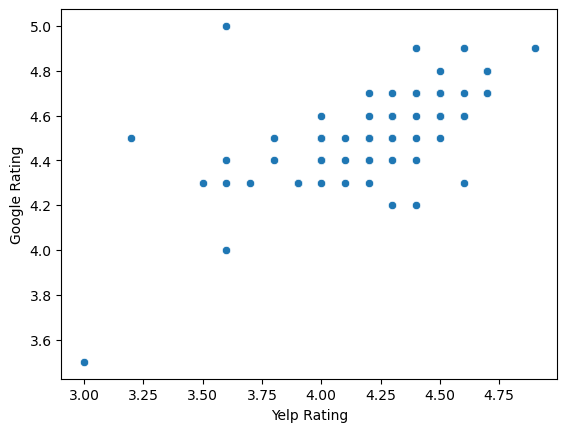

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ramen_df = pd.read_csv("ramen.csv").drop(0).reset_index(drop=True)
ramen_df["Google Reviews"] = pd.to_numeric(ramen_df["Google Reviews"], errors="coerce")
ramen_df["Google Rating"] = pd.to_numeric(ramen_df["Google Rating"], errors="coerce")

r = ramen_df['Google Rating'].corr(ramen_df['Yelp Rating'])
print("Pearson correlation coefficient:", r)
print("Coefficient of determination:", r**2)

sns.scatterplot(x="Yelp Rating", y="Google Rating", data=ramen_df)
plt.show()

# Let's make another scatterplot of the number of Google reviews vs. the number of Yelp reviews first.
# An unusual amount of either of these indicates something very abnormal with our values (e.g. botting or internal server error).

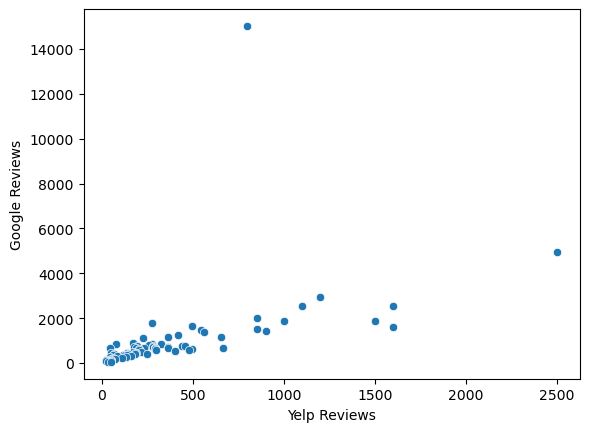

In [18]:
sns.scatterplot(x="Yelp Reviews", y="Google Reviews", data=ramen_df)
plt.show()

# It appears a few values are unusual, but one is way more unusual than others: Jinya Ramen.
# It has an extremely high number of Google reviews, as well as an extremely high Google rating.
# The owners or someone associated with them likely bought reviews, so we can drop that store and see how our coefficients changed.

In [19]:
ramen_df = ramen_df.drop(0).reset_index(drop=True)
r = ramen_df['Google Rating'].corr(ramen_df['Yelp Rating'])
print("Pearson correlation coefficient:", r)
print("Coefficient of determination:", r**2)

Pearson correlation coefficient: 0.6377028292753742
Coefficient of determination: 0.4066648984658171


# Both of our correlation coefficients increased noticeably.
# This indicates Jinya Ramen was massively skewing our distribution. Good thing we removed it.

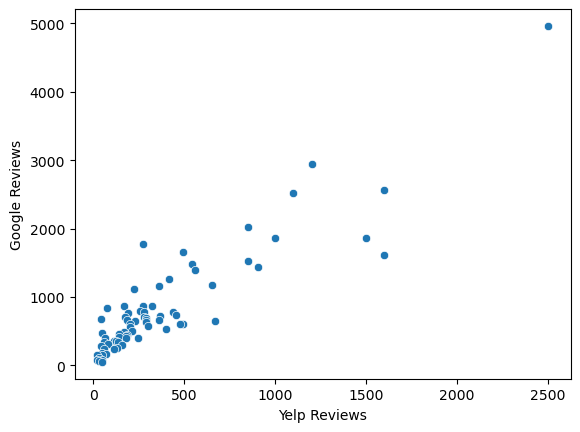

In [20]:
sns.scatterplot(x="Yelp Reviews", y="Google Reviews", data=ramen_df)
plt.show()

# The scatterplot appears pretty normal now. I don't think any more values need to be dropped.
# Now, it's time to answer the question: which restaurants have an unusually high Yelp/Google rating?
# Let's bring back our rating graph to answer this.

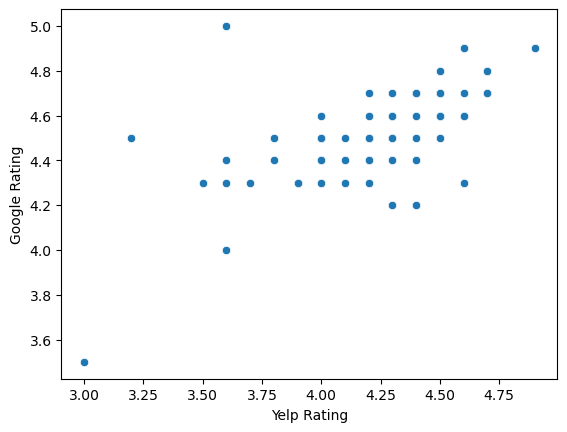

In [21]:
sns.scatterplot(x="Yelp Rating", y="Google Rating", data=ramen_df)
plt.show()

# I notice a couple unusual points:
# One at (3.0, 3.5) with a generally low rating all around (Mizu Izakaya).
# One at (3.2, 4.5) with an unusually high Google rating (Cupbop).
# One at (3.6, 5.0) with an unusually high Google rating as well (Mugi Ramen and Poke).
# One at (4.9, 4.9) with an unusually high Yelp rating, and a generally high rating all around (Nomi Thai Ramen).
# Let's find their specific entries in the dataframe to figure out why:

In [24]:
print(ramen_df.iloc[71])
print(ramen_df.iloc[21])
print(ramen_df.iloc[72])
print(ramen_df.iloc[46])

Name              Mizu Izakaya
Neighborhood               DIA
Yelp Rating                3.0
Yelp Reviews                34
Google Rating              3.5
Google Reviews              68
Name: 71, dtype: object
Name              Cupbop - Korean BBQ in a Cup
Neighborhood                          Highland
Yelp Rating                                3.2
Yelp Reviews                                75
Google Rating                              4.5
Google Reviews                             842
Name: 21, dtype: object
Name              Mugi Ramen and Poke
Neighborhood                Park Hill
Yelp Rating                       3.6
Yelp Reviews                       48
Google Rating                     5.0
Google Reviews                     50
Name: 72, dtype: object
Name              Nomi Thai Ramen
Neighborhood         Cherry Creek
Yelp Rating                   4.9
Yelp Reviews                   50
Google Rating                 4.9
Google Reviews                468
Name: 46, dtype: object


# Let's go one-by-one to understand why these restaurants are like this.
# Mizu Izakaya:
# Generally low rating and number of reviews. Probably just not a good restaurant.
# Searching it up, it appears it only recently opened. Only offered a limited menu until the end of August.
# Cupbop:
# Google reviews are ~11x more abundant than Yelp reviews, and tend to be higher as well; clear signs of botting.
# Searching it up, several 5-star reviews appear to be translated and owner comments on 5-star reviews are copy-pasted.
# Mugi Ramen and Poke:
# Has an unusually high number of Yelp reviews despite the high Google rating.
# Searching it up, every Google review is 5 stars, likely botted.
# Every Google review is <3 months old, oldest Yelp review is 2022; new presence on Google.
# Google reviews are virtually frozen; as of September 2025, there are now 67 Yelp reviews (+19) and only 51 Google reviews (+1).
# It's possible they could have shut down a previous Google page and created this new one in order to buy reviews on it.
# Nomi Thai Ramen:
# Google reviews are ~9x more abundant than Yelp reviews, but are as high as Yelp reviews.
# Searching it up, both Yelp and Google reviews are near universally positive; both platforms were likely botted.
# Owner comments are copy-pasted and in the same style as the ones on Cupbop; both restaurants likely used the same service.

# Conclusions:
# I found a few unusual restaurants:
# Mizu Izakaya, with a low rating and number of reviews, due to being new and only offering a limited menu.
# Cupbop, with abundant Google reviews and a high Google rating, which appears to have bought reviews.
# Mugi Ramen and Poke, with a high Google rating and number of Yelp reviews, which created the Google page recently in order to bot it.
# Nomi Thai Ramen, with many Google reviews and a generally high rating on both platforms, which appears to have bought reviews.